# Analysis of the Intro-Favorites-andOtherQs CSV File

## Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Intro-Favorites-andOtherQs.csv')

ParserError: Error tokenizing data. C error: Expected 1 fields in line 18, saw 2


In [3]:
df.columns

Index(['First Name', 'Last Name', 'Initials', 'Favorite Movie',
       'Favorite TV Show', 'Favorite video game', 'Favorite Band',
       'Favorite Book', 'Favorite Sport', 'Favorite Restaurant',
       'Do you cook?', 'Do you have a pet?', 'Personality Type?'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   First Name           120 non-null    object
 1   Last Name            121 non-null    object
 2   Initials             122 non-null    object
 3   Favorite Movie       118 non-null    object
 4   Favorite TV Show     119 non-null    object
 5   Favorite video game  121 non-null    object
 6   Favorite Band        101 non-null    object
 7   Favorite Book        116 non-null    object
 8   Favorite Sport       123 non-null    object
 9   Favorite Restaurant  120 non-null    object
 10  Do you cook?         130 non-null    object
 11  Do you have a pet?   129 non-null    object
 12  Personality Type?    117 non-null    object
dtypes: object(13)
memory usage: 18.3+ KB


### The data is too horrible so let us try and salvage as much as we can. Just to get some resuls

### Let's drop all NaN values in this dataset. Store the results in a temporary dataframe and call it tempdf

In [6]:
tempdf = df.dropna().reset_index()

In [7]:
tempdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   index                72 non-null     int64 
 1   First Name           72 non-null     object
 2   Last Name            72 non-null     object
 3   Initials             72 non-null     object
 4   Favorite Movie       72 non-null     object
 5   Favorite TV Show     72 non-null     object
 6   Favorite video game  72 non-null     object
 7   Favorite Band        72 non-null     object
 8   Favorite Book        72 non-null     object
 9   Favorite Sport       72 non-null     object
 10  Favorite Restaurant  72 non-null     object
 11  Do you cook?         72 non-null     object
 12  Do you have a pet?   72 non-null     object
 13  Personality Type?    72 non-null     object
dtypes: int64(1), object(13)
memory usage: 8.0+ KB


### Let's take a look at the 'Personality Type?' column. Especially, the unique values in it

In [8]:
tempdf['Personality Type?'].unique()

array(['INFP-T', 'INTJ-A', 'Tired', 'idk', 'ESTP', 'Not sure', 'INTP-T',
       'ISFJ-A', 'INTJ-T', 'INFJ-T', 'ENTP-T', 'INFP', 'ISTJ-A', 'ISTP-A',
       'ESFP-T', 'ENFP-T', 'ENTP-A', 'INTJ', 'ENFJ-A', 'ESTJ-A', 'yes',
       'IDK', 'INFJ-A', 'ESFJ-A', 'TJ', 'ENFP-A', 'ENTP', 'ISTJ-T',
       'ESTJ', 'ENTJ-A', 'ENFJ', 'INTP-A', 'ISFP-T', 'intp', 'ISTP-T',
       'ENFJ-T', 'Yes', 'Anti-social', 'Introvert', 'INTJ-J', 'INFJ/INTP'],
      dtype=object)

### Notice that there are upper case characters. It is better to convert all letters to lower case when you do analysis on textual data

### We will use the lambda function a lot in our case studies. Not included in your exam but it is a very powerful function to familiarize yourselves with

In [62]:
tempdf['Personality Type?'] = tempdf['Personality Type?'].apply(lambda x: x.lower())

### Check the unique values again

In [63]:
tempdf['Personality Type?'].unique()

array(['infp-t', 'intj-a', 'tired', 'idk', 'estp', 'not sure', 'intp-t',
       'isfj-a', 'intj-t', 'infj-t', 'entp-t', 'infp', 'istj-a', 'istp-a',
       'esfp-t', 'enfp-t', 'entp-a', 'intj', 'enfj-a', 'estj-a', 'yes',
       'infj-a', 'esfj-a', 'tj', 'enfp-a', 'entp', 'istj-t', 'estj',
       'entj-a', 'enfj', 'intp-a', 'isfp-t', 'intp', 'istp-t', 'enfj-t',
       'anti-social', 'introvert', 'intj-j', 'infj/intp'], dtype=object)

### When you clean the data for your analysis, you want to come up with methodologies that would improve the data clarity without losing valuable information from it. In our case, if we removed the -a or -t next to the personality type, we won't lose significant information and this would enhance the clarity. We use a lambda function to achieve that as follows

In [64]:
tempdf['Personality Type?'] = tempdf['Personality Type?'].apply(lambda x: x.split('-')[0])

In [65]:
tempdf['Personality Type?'].unique()

array(['infp', 'intj', 'tired', 'idk', 'estp', 'not sure', 'intp', 'isfj',
       'infj', 'entp', 'istj', 'istp', 'esfp', 'enfp', 'enfj', 'estj',
       'yes', 'esfj', 'tj', 'entj', 'isfp', 'anti', 'introvert',
       'infj/intp'], dtype=object)

### The data is much better now. However, there are still some noise in there. In the class we agreed that the best way to clean this noise is to select the entries that starts with either 'i' or 'e' and has a length of 4. Other than that, we will convert that entry into None

In [66]:
tempdf['Personality Type?'] = tempdf['Personality Type?'].apply(lambda x: x if (x[0] == 'i' or x[0] == 'e') and len(x) == 4 else None)

In [67]:
tempdf.shape

(72, 14)

### We drop the new None

In [68]:
tempdf = tempdf.dropna()

In [69]:
tempdf.shape

(60, 14)

### Now we have a clean data that we can analyze. However, we lost a lot of records for this sake.

In [70]:
tempdf['Personality Type?'].unique()

array(['infp', 'intj', 'estp', 'intp', 'isfj', 'infj', 'entp', 'istj',
       'istp', 'esfp', 'enfp', 'enfj', 'estj', 'esfj', 'entj', 'isfp'],
      dtype=object)

### Grouping an Plotting

In [45]:
personality = tempdf.groupby('Personality Type?')['Initials'].count().reset_index()

In [48]:
personality = personality.rename(columns={'Initials': 'Counts'})

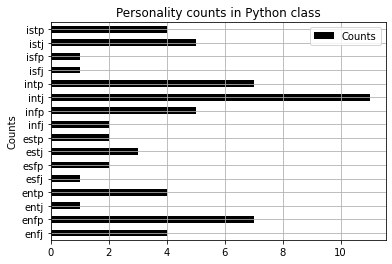

In [74]:
personality.plot.barh(x='Personality Type?', y='Counts', color='black')
plt.grid()
plt.ylabel('Counts')
plt.title('Personality counts in Python class');

### The job is still not over at this point. A data scientist would go back to the original dataframe and try and salvage as much data as possible for analysis. If you follow the same approach as above, you should be able reach the same conclusion.